<a href="https://colab.research.google.com/github/daphnecor/Advanced_machine_learning/blob/main/AML_Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reproducing the phase plot of the Sherrington-Kirkpatrick (SK) model

In [ ]:
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy
import pandas as pd
import scipy.stats as stats
import warnings 
from scipy import integrate
import seaborn as sns
from numpy import sqrt, cosh, tanh, pi, exp, log
warnings.simplefilter('ignore')
cmap = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
np.random.seed(0)

In [ ]:
'''
Make an equally spaced grid for x and y
'''
x_range = np.arange(0.05, 2.05, 0.05)
y_range = np.arange(0.05, 2.05, 0.05)
xgrid, ygrid = np.meshgrid(x_range, y_range)   
 
J0grid = (xgrid/ygrid)
Jgrid= 1/ygrid

In [ ]:
'''
Define functions for q, m and entropy h
'''
q_func = lambda z, q, m, J, J0: exp(-z**2/2) * cosh(J * sqrt(q) * z + J0 * m)**(-2)  
m_func = lambda z, q, m, J, J0: exp(-z**2/2) * tanh(J * sqrt(q) * z + J0 * m)   
h_func = lambda z, q, m, J, J0: np.exp(-(z**2)/2) * (abs((J0*m) + (J * sqrt(q) * z)) + log(1 + exp(-2 * abs((J0 * m) + (J * sqrt(q) * z))))) 

In [ ]:
def fixed_point_iteration(J, J0, q_init, m_init, tol=10e-8, maxiter=1000):
  ''' Fixed point iteration algorithm. '''

  q, m, it = 10, 10, 0
  while ((abs(q - q_init) > tol) or (abs(m - m_init) > tol)) and (iter < maxiter):
    
    if (abs(q - q_init) > tol):
      q_init = q
      q_temp, _ = scipy.integrate.quad(q_func, -np.inf, np.inf, args=(q_init, m_init, J, J0))
      q = 1 - (1 / np.sqrt(2 * np.pi)) * q_temp

    if (abs(m - m_init) > tol):
      m_init = m
      m_temp, _ = scipy.integrate.quad(m_func, -np.inf, np.inf, args=(q_init, m_init, J, J0)) 
      m = (1 / np.sqrt(2 * np.pi)) * m_temp
    it += 1
    
  return [q, m, it]

In [ ]:
'''
Run everything
'''
Q = np.zeros_like(xgrid)
M = np.zeros_like(xgrid)
H = np.zeros_like(xgrid)
iters = np.zeros_like(xgrid)

np.random.seed(0)

q_init, m_init = np.random.rand(), np.random.rand()

for i, x in enumerate(J0grid):
  for j, y in enumerate(Jgrid):

    J0 = J0grid[i, j]
    J  = Jgrid[i, j]

    q, m, iters[i, j] = fixed_point_iteration(J, J0, q_init, m_init)
    
    Q[i, j], M[i, j] = q, m

    entropy, _ = scipy.integrate.quad(h_func, -np.inf, np.inf, args=(q, m, J, J0)) 
    H[i, j] = (-1/4) * (J**2) * ((q - 1)**2) + (1/sqrt(2*pi)) * entropy - (J0*(m**2)) - ((J**2) * q * (1-q)) 

## Plot the solutions for q amd m

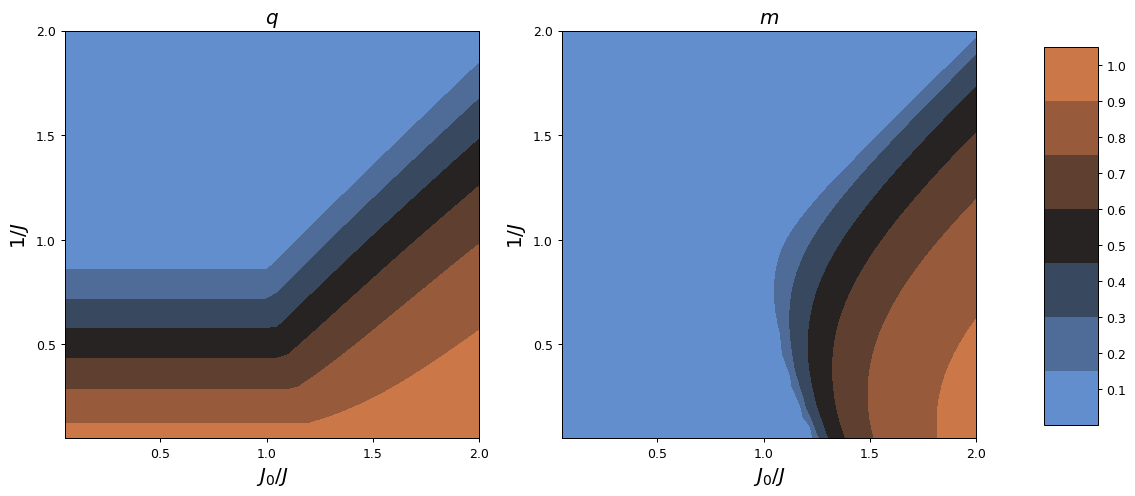

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 6), dpi=90)
ax1.set_title(r'$q$', fontsize=16)
cp = ax1.contourf(xgrid, ygrid, Q, cmap=cmap)
ax1.set_xlabel(r'$J_0/J$', fontsize=16) # x
ax1.set_ylabel(r'$1/J$', fontsize=16);  # y
ax1.set_xticks([0.5, 1, 1.5, 2])
ax1.set_yticks([0.5, 1, 1.5, 2])

ax2.set_title(r'$m$', fontsize=16)
ax2.contourf(xgrid, ygrid, M, cmap=cmap)
ax2.set_xlabel(r'$J_0 / J$', fontsize=16)
ax2.set_ylabel(r'$1 / J$', fontsize=16);
ax2.set_xticks([0.5, 1, 1.5, 2])
ax2.set_yticks([0.5, 1, 1.5, 2])

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.04, 0.7])
fig.colorbar(cp, cax=cbar_ax, ticks=np.arange(0.1,1.1,0.1));

## Plot the entropy H

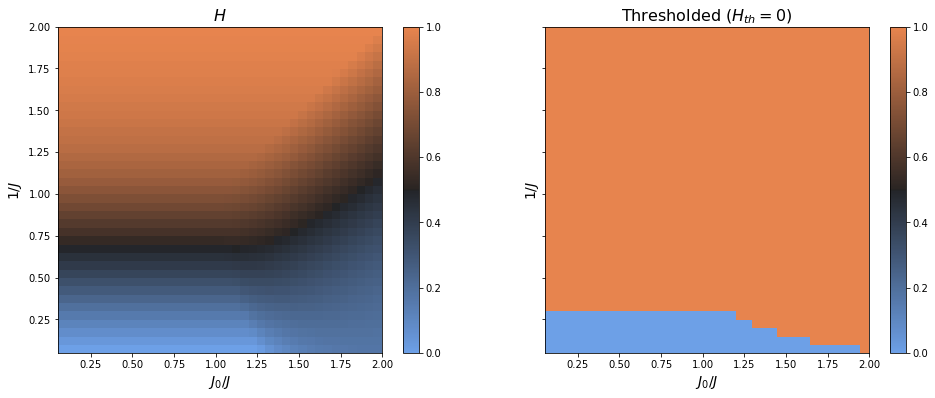

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True);

pcm = ax1.pcolormesh(xgrid, ygrid, H, cmap=cmap);
ax1.set_xlabel(r'$J_0/J$', fontsize=14) # x
ax1.set_ylabel(r'$1/J$', fontsize=14)  # y
ax1.set_title(r'$H$', fontsize=16)
fig.colorbar(plt.cm.ScalarMappable(cmap=cmap), ax=ax1)

H_th = H > 0
pcm = ax2.pcolormesh(xgrid, ygrid, H_th, cmap=cmap)
ax2.set_xlabel(r'$J_0/J$', fontsize=14) # x
ax2.set_ylabel(r'$1/J$', fontsize=14)  # y
ax2.set_title(r'Thresholded ($H_{th} = 0$)', fontsize=16)
fig.colorbar(plt.cm.ScalarMappable(cmap=cmap), ax=ax2);